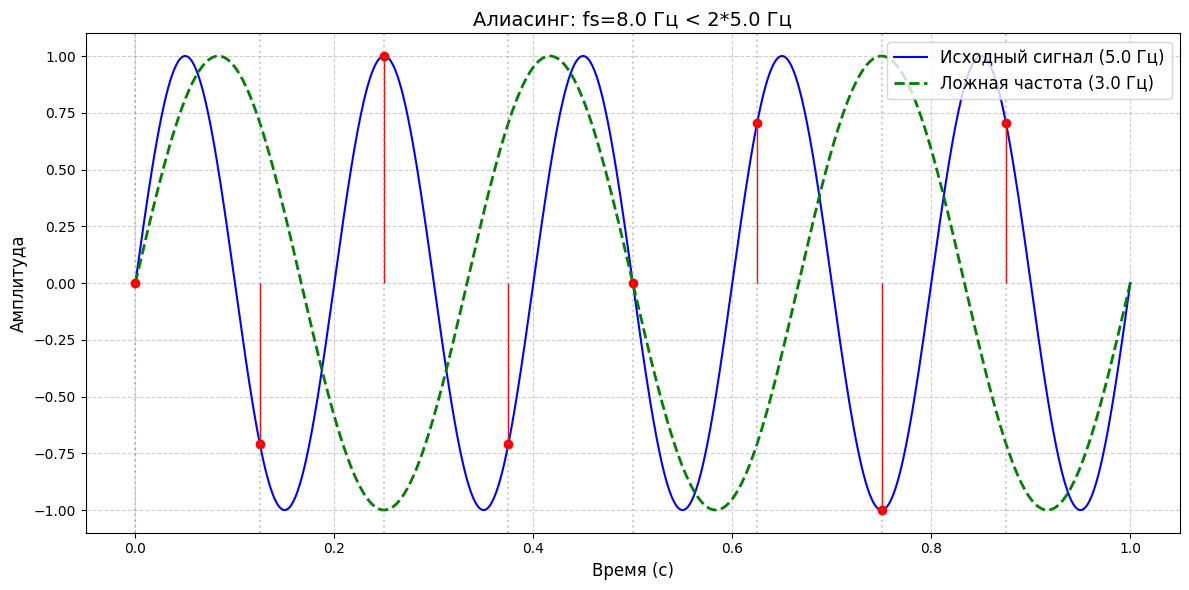

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
f_original = 5.0    # Исходная частота сигнала (Гц)
f_sampling = 8.0    # Частота дискретизации (Гц)
duration = 1.0      # Длительность сигнала (сек)
f_alias = abs(f_sampling - f_original)  # Ложная частота (3 Гц)

# Временные оси
t_continuous = np.linspace(0, duration, 1000)
t_sampled = np.arange(0, duration, 1/f_sampling)  # Моменты дискретизации

# Сигналы
signal_continuous = np.sin(2 * np.pi * f_original * t_continuous)
signal_sampled = np.sin(2 * np.pi * f_original * t_sampled)
signal_alias = np.sin(2 * np.pi * f_alias * t_continuous)  # Ложный сигнал

plt.figure(figsize=(12, 6))

# Исходный и ложный сигналы
plt.plot(t_continuous, signal_continuous, 'b-',
         label=f'Исходный сигнал ({f_original} Гц)')
plt.plot(t_continuous, signal_alias, 'g--',
         label=f'Ложная частота ({f_alias} Гц)', linewidth=2)

# отсчёты
markerline, stemlines, _ = plt.stem(
    t_sampled, signal_sampled, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'markersize', 6, 'markerfacecolor', 'r')

plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Амплитуда', fontsize=12)
plt.title(f'Алиасинг: fs={f_sampling} Гц < 2*{f_original} Гц', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

for t in t_sampled:
    plt.axvline(t, color='gray', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Параметры сигнала (теперь с увеличенной длительностью)
f_original = 22.0  # Исходная частота (Гц)
f_sampling = 30.0  # Частота дискретизации (Гц)
duration = 2.0
f_alias = abs(f_sampling - f_original)  # Ложная частота (8 Гц)

# Генерация сигналов
t_continuous = np.linspace(0, duration, 10000, endpoint=False)
t_sampled = np.arange(0, duration, 1/f_sampling)

signal_cont = np.sin(2 * np.pi * f_original * t_continuous)
signal_sampled = np.sin(2 * np.pi * f_original * t_sampled)

# Функция для вычисления спектра с нормализацией
def compute_spectrum(signal, time):
    n = len(signal)
    delta_t = time[1] - time[0]
    yf = 2.0/n * np.abs(fft(signal)[:n//2])
    xf = fftfreq(n, delta_t)[:n//2]
    return xf, yf

# Вычисление спектров
xf_cont, yf_cont = compute_spectrum(signal_cont, t_continuous)
xf_samp, yf_samp = compute_spectrum(signal_sampled, t_sampled)

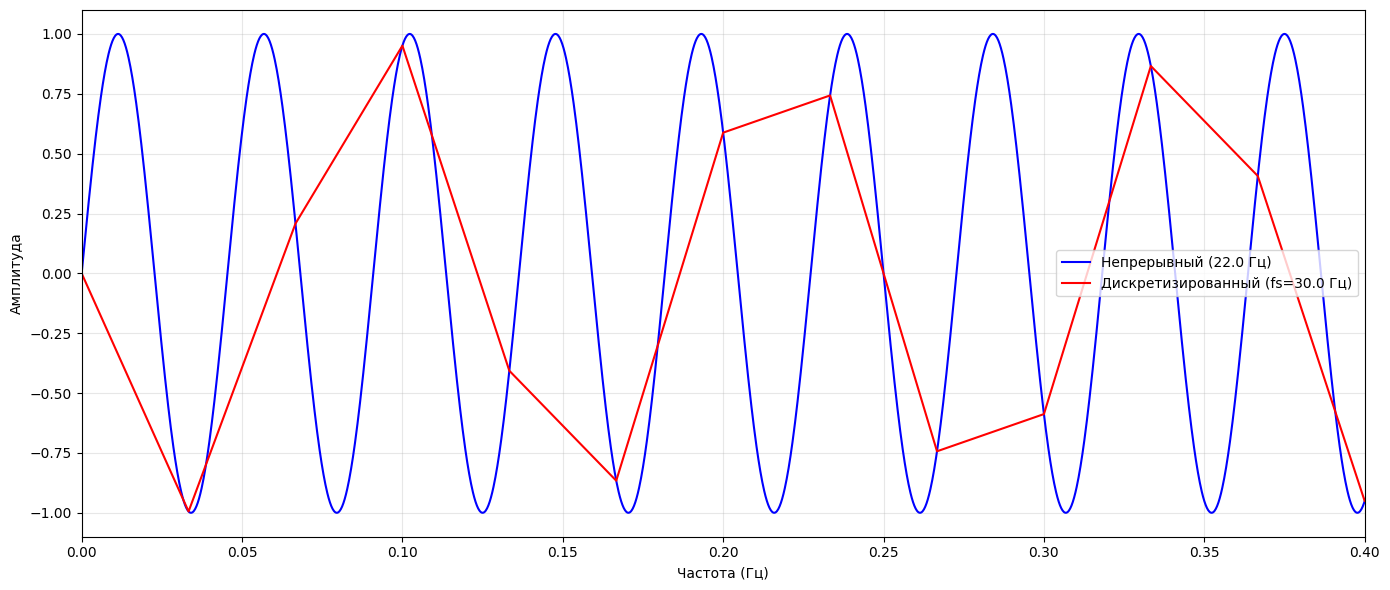

In [169]:
# Визуализация
plt.figure(figsize=(14, 6))

# Спектр в линейном масштабе (для точного отображения амплитуд)
plt.plot(t_continuous, signal_cont, 'b-', label=f'Непрерывный ({f_original} Гц)', linewidth=1.5)
plt.plot(t_sampled, signal_sampled, 'r-', label=f'Дискретизированный (fs={f_sampling} Гц)', linewidth=1.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, 0.4)
plt.grid(True, alpha=0.3)
plt.legend()


plt.tight_layout()
plt.show()

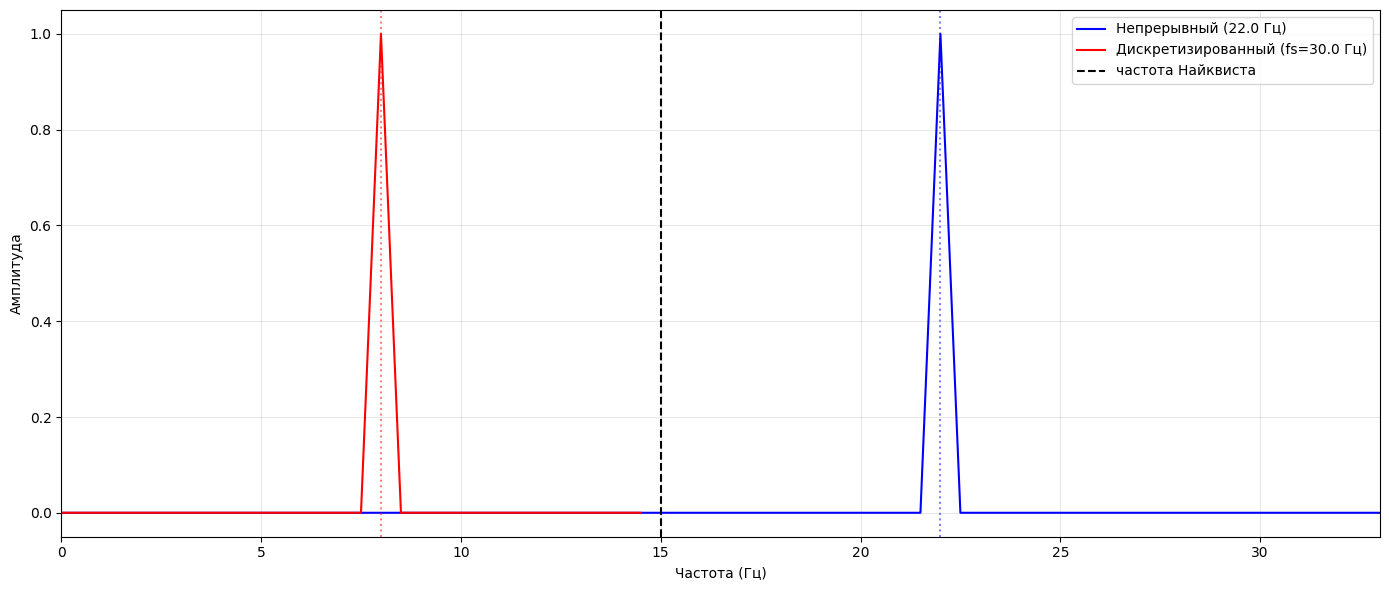

In [170]:
plt.figure(figsize=(14, 6))

# Спектр в линейном масштабе
plt.plot(xf_cont, yf_cont, 'b-', label=f'Непрерывный ({f_original} Гц)', linewidth=1.5)
plt.plot(xf_samp, yf_samp, 'r-', label=f'Дискретизированный (fs={f_sampling} Гц)', linewidth=1.5)
plt.axvline(f_sampling/2, color='k', linestyle='--', label='частота Найквиста')
plt.axvline(f_original, color='b', linestyle=':', alpha=0.5)
plt.axvline(f_alias, color='r', linestyle=':', alpha=0.5)
plt.xlim(0, f_sampling*1.1)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()


plt.tight_layout()
plt.show()

In [171]:
from scipy import signal

In [172]:
wave_duration = 3
sample_rate = 100
freq = 2
high_freq = 12
q = 5

samples = wave_duration*sample_rate
samples_decimated = int(samples/q)

x = np.linspace(0, wave_duration, samples, endpoint=False)
y = np.cos(x*np.pi*freq*2) + np.cos(x*np.pi*high_freq*2)

ydem = signal.decimate(y, q)
xnew = np.linspace(0, wave_duration, samples_decimated, endpoint=False)

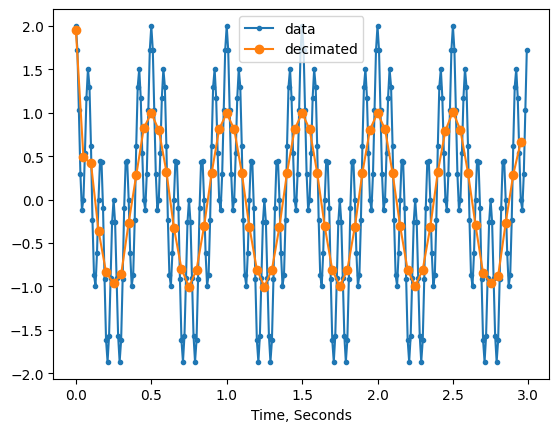

In [173]:
plt.plot(x, y, '.-', xnew, ydem, 'o-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.show()

In [174]:
xf_new, yf_new = compute_spectrum(ydem, xnew)
xf, yf = compute_spectrum(y, x)

In [175]:
f_alias = abs(sample_rate/q - high_freq)

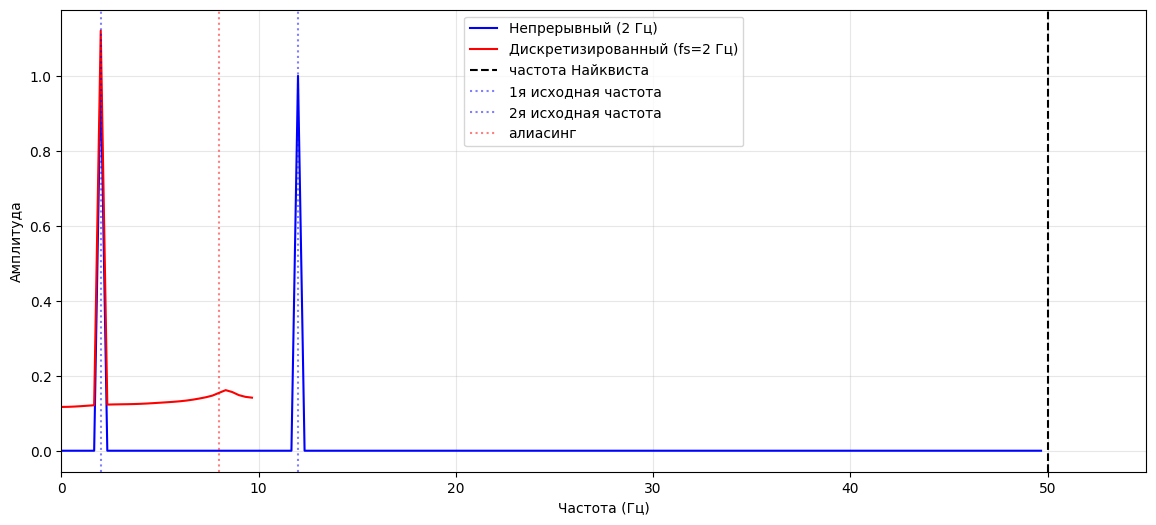

In [176]:
plt.figure(figsize=(14, 6))
plt.plot(xf, yf, 'b-', label=f'Непрерывный ({freq} Гц)', linewidth=1.5)
plt.plot(xf_new, yf_new + 0.1, 'r-', label=f'Дискретизированный (fs={freq} Гц)', linewidth=1.5)
plt.axvline(sample_rate/2, color='k', linestyle='--', label='частота Найквиста')
plt.axvline(freq, color='b', linestyle=':', alpha=0.5, label='1я исходная частота')
plt.axvline(high_freq, color='b', linestyle=':', alpha=0.5, label='2я исходная частота')
plt.axvline(f_alias, color='r', linestyle=':', alpha=0.5, label='алиасинг')
plt.xlim(0, sample_rate*0.55)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()

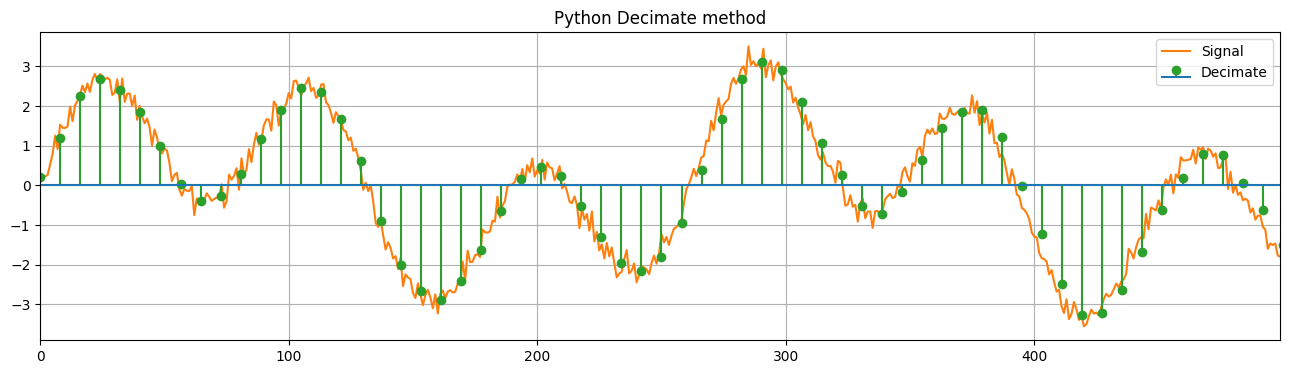

In [177]:
# Input signal
N = 500
tt = np.linspace(0, 1, N)
x = 1.5 * np.sin(4 * np.pi * tt) + 1.9 * np.sin(11.3 * np.pi * tt) + 0.2 * np.random.randn(N)

# Decimation
y = signal.decimate(x, q=8, n=8)
ty = np.linspace(0, 1, y.size)

# Plot figure
plt.figure(figsize=(16, 4))
plt.title('Python Decimate method')
plt.plot(x, '-', color='C1', label='Signal')
plt.stem(np.linspace(0, N, y.size), y, linefmt='C2', basefmt='C0', label='Decimate')
plt.xlim([0, N-1])
plt.legend(loc='upper right')
plt.grid(True)

In [178]:
wave_duration = 3
sample_rate = 100
freq = 2
high_freq = 55
q = 5

samples = wave_duration * sample_rate
samples_interpolated = int(samples * q)

x = np.linspace(0, wave_duration, samples, endpoint=False)
y = np.cos(x*np.pi*freq*2) + np.cos(x*np.pi*high_freq*2)

y_interp = []

for i in y:
  y_interp.append(i)
  y_interp.extend([0]*(q - 1))

xnew = np.linspace(0, wave_duration, samples_interpolated, endpoint=False)

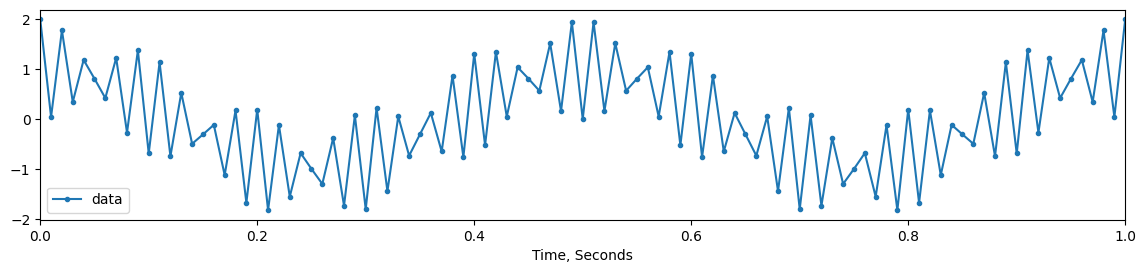

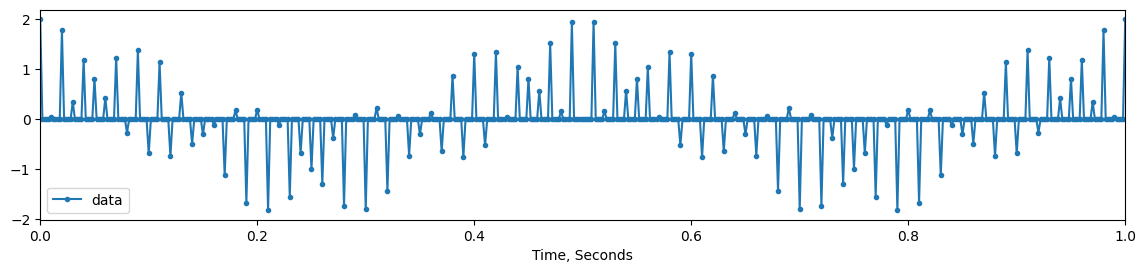

In [179]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y, '.-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.xlim(0, 1)
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 2)
plt.plot(xnew, y_interp, '.-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.xlim(0, 1)
plt.show()

In [180]:
xf_interp, yf_interp = compute_spectrum(y_interp, xnew)
xf, yf = compute_spectrum(y, x)

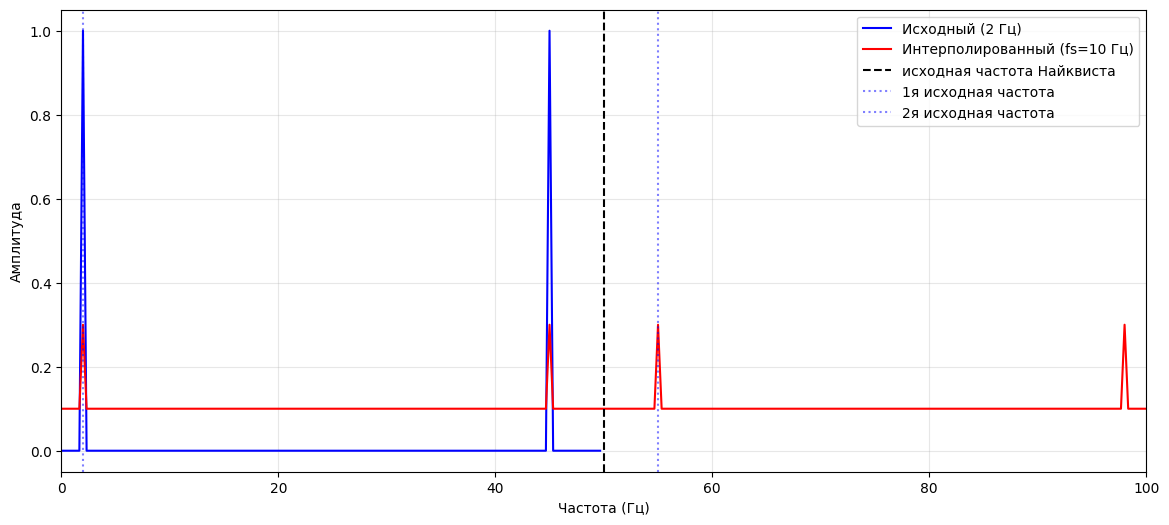

In [188]:
plt.figure(figsize=(14, 6))
plt.plot(xf, yf, 'b-', label=f'Исходный ({freq} Гц)', linewidth=1.5)
plt.plot(xf_interp, yf_interp + 0.1, 'r-', label=f'Интерполированный (fs={freq*q} Гц)', linewidth=1.5)
plt.axvline(sample_rate/2, color='k', linestyle='--', label='исходная частота Найквиста')
plt.axvline(freq, color='b', linestyle=':', alpha=0.5, label='1я исходная частота')
plt.axvline(high_freq, color='b', linestyle=':', alpha=0.5, label='2я исходная частота')
plt.xlim(0, sample_rate)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()

In [182]:
from scipy.signal import lfilter, remez

cutoff = sample_rate / 2   # Частота отсечки, Гц
trans_width = 3  # Ширина перехода от частоты отсечки до подавления, Гц
numtaps = 325      # порядок фильтра
taps = remez(numtaps,
                    [0, cutoff, cutoff + trans_width, 0.5*sample_rate*q],
                    [1, 0],
                    fs=sample_rate*q)

y_filtered = lfilter(taps, np.ones(1), y_interp)

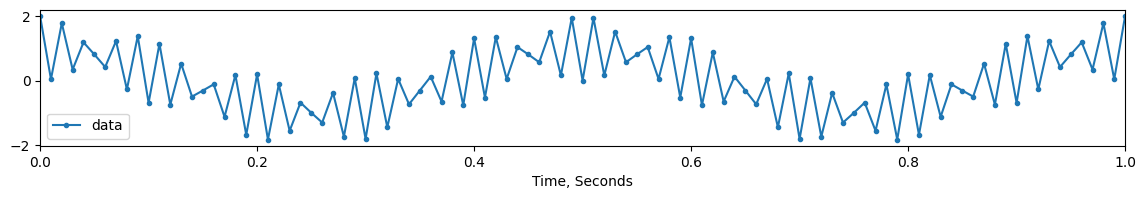

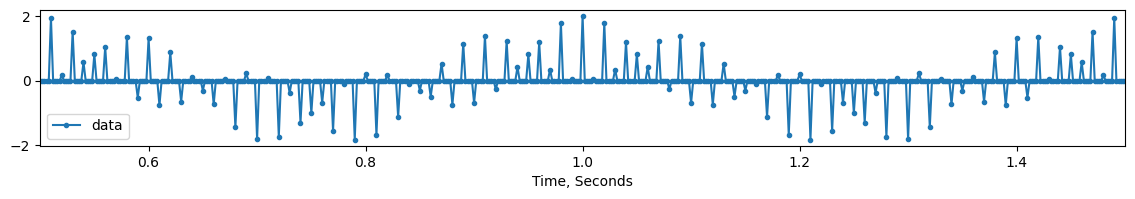

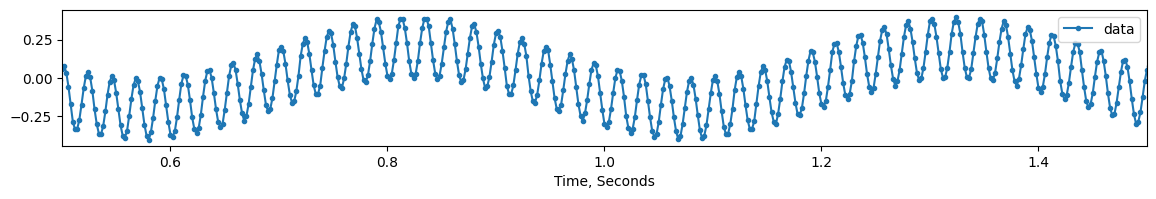

In [184]:
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(x, y, '.-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.xlim(0, 1)
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 2)
plt.plot(xnew, y_interp, '.-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.xlim(0.5, 1.5)
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 3)
plt.plot(xnew, y_filtered, '.-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.xlim(0.5, 1.5)
plt.show()

In [190]:
xf_interp, yf_interp = compute_spectrum(y_filtered, xnew)
xf, yf = compute_spectrum(y, x)

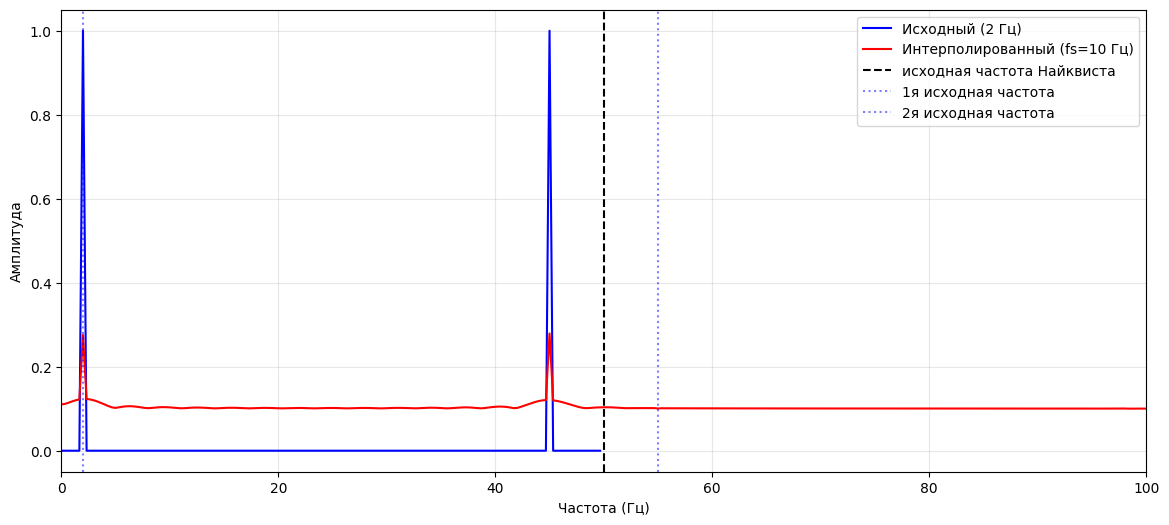

In [191]:
plt.figure(figsize=(14, 6))
plt.plot(xf, yf, 'b-', label=f'Исходный ({freq} Гц)', linewidth=1.5)
plt.plot(xf_interp, yf_interp + 0.1, 'r-', label=f'Интерполированный (fs={freq*q} Гц)', linewidth=1.5)
plt.axvline(sample_rate/2, color='k', linestyle='--', label='исходная частота Найквиста')
plt.axvline(freq, color='b', linestyle=':', alpha=0.5, label='1я исходная частота')
plt.axvline(high_freq, color='b', linestyle=':', alpha=0.5, label='2я исходная частота')
plt.xlim(0, sample_rate)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()